Predictor coefficients: [ 1.         -1.17229942  0.03073697  0.02332478  0.01653609  0.01018943
  0.14267129]


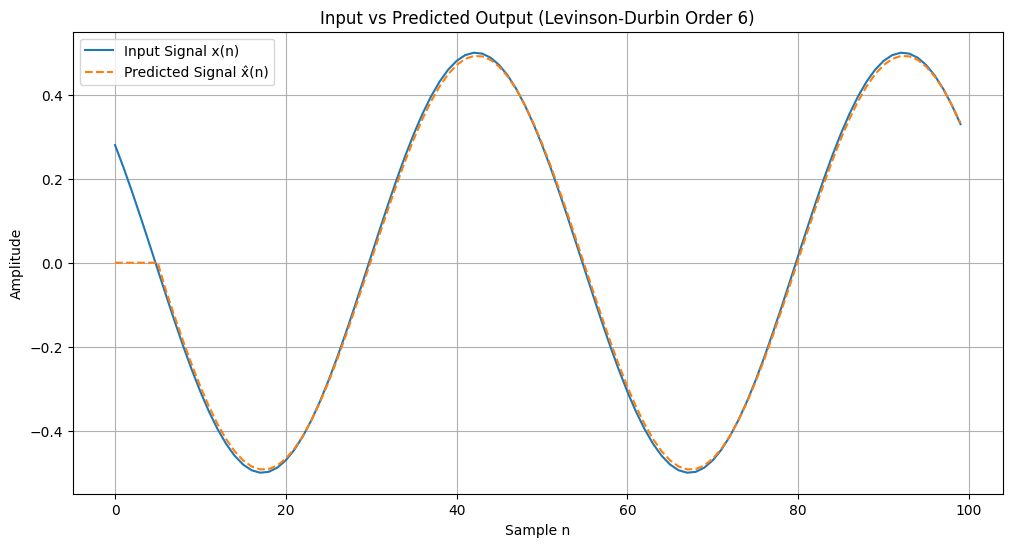

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve_toeplitz

# Parameters
f = 1  # frequency in Hz
fs = 50  # sampling frequency
N = 100  # number of samples
phi = np.random.uniform(0, 2 * np.pi)  # random phi

# Time vector
n = np.arange(N)

# Input process x(n)
x = 0.5 * np.cos(2 * np.pi * f * n / fs + phi)

# Compute autocorrelation
r = np.correlate(x, x, mode='full') / N
mid = len(r) // 2
r = r[mid:mid+7]  # Take r(0) to r(6)

# Levinson-Durbin recursion
def levinson_durbin(r, order):
    a = np.zeros(order + 1)
    e = r[0]
    a[0] = 1

    for i in range(1, order + 1):
        acc = sum(a[j] * r[i - j] for j in range(1, i))
        k = -(r[i] + acc) / e
        a_new = a.copy()
        for j in range(1, i):
            a_new[j] = a[j] + k * a[i - j]
        a_new[i] = k
        e *= (1 - k ** 2)
        a = a_new
    return a, e

# Order of predictor
order = 6
a_coeffs, error = levinson_durbin(r, order)

print("Predictor coefficients:", a_coeffs)

# Predict the output using the coefficients
x_hat = np.zeros(N)
for i in range(order, N):
    x_hat[i] = -np.dot(a_coeffs[1:], x[i-order:i][::-1])

# Plot input and predicted output
plt.figure(figsize=(12, 6))
plt.plot(n, x, label='Input Signal x(n)')
plt.plot(n, x_hat, label='Predicted Signal x̂(n)', linestyle='--')
plt.xlabel('Sample n')
plt.ylabel('Amplitude')
plt.title('Input vs Predicted Output (Levinson-Durbin Order 6)')
plt.legend()
plt.grid(True)
plt.show()
